First 5 Rows:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 

✅ Accuracy Score: 0.9885

📋 Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1208
        Spam       0.97      0.95      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



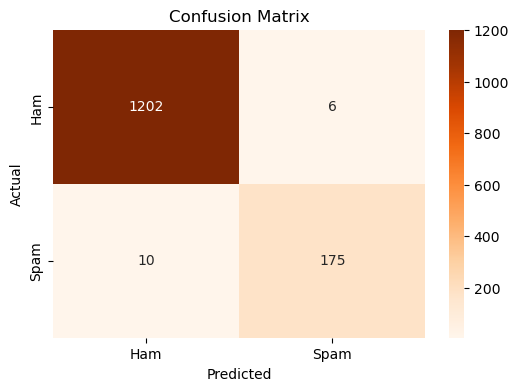

In [5]:
# 🛠 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", names=["label", "message"])
print("First 5 Rows:\n", df.head(), "\n")

# Encode Labels: 'ham' -> 0, 'spam' -> 1
df["label_num"] = df["label"].apply(lambda x: 1 if x == "spam" else 0)

#  Split Data into Train/Test
X = df["message"]
y = df["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#  Vectorize Text Messages
vectorizer = CountVectorizer(max_features=3000)  # Limit to top 3000 frequent words
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#  Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

#  Make Predictions
y_pred = model.predict(X_test_vec)

#  Evaluation Metrics
print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Ham", "Spam"]
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

